# Full Rank Markov and Geographic Rank Markov 

**Author: Wei Kang <weikang9009@gmail.com>**

In [1]:
import pysal.lib as ps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import geopandas as gpd

## Full Rank Markov

In [2]:
from pysal.explore.giddy.markov import FullRank_Markov

In [3]:
income_table = pd.read_csv(ps.examples.get_path("usjoin.csv"))
income_table.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


In [4]:
pci = income_table[list(map(str,range(1929,2010)))].values
pci

array([[  323,   267,   224, ..., 31988, 32819, 32274],
       [  600,   520,   429, ..., 33470, 33445, 32077],
       [  310,   228,   215, ..., 31070, 31800, 31493],
       ...,
       [  460,   408,   356, ..., 29769, 31265, 31843],
       [  673,   588,   469, ..., 35839, 36594, 35676],
       [  675,   585,   476, ..., 43453, 45177, 42504]])

In [5]:
m = FullRank_Markov(pci)
m.ranks

array([[45, 45, 44, ..., 41, 40, 39],
       [24, 25, 25, ..., 36, 38, 41],
       [46, 47, 45, ..., 43, 43, 43],
       ...,
       [34, 34, 34, ..., 47, 46, 42],
       [17, 17, 22, ..., 25, 26, 25],
       [16, 18, 19, ...,  6,  6,  7]])

In [6]:
m.transitions

array([[66.,  5.,  5., ...,  0.,  0.,  0.],
       [ 8., 51.,  9., ...,  0.,  0.,  0.],
       [ 2., 13., 44., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 40., 17.,  0.],
       [ 0.,  0.,  0., ..., 15., 54.,  2.],
       [ 0.,  0.,  0., ...,  2.,  1., 77.]])

Full rank Markov transition probability matrix

In [7]:
m.p

array([[0.825 , 0.0625, 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.1   , 0.6375, 0.1125, ..., 0.    , 0.    , 0.    ],
       [0.025 , 0.1625, 0.55  , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.5   , 0.2125, 0.    ],
       [0.    , 0.    , 0.    , ..., 0.1875, 0.675 , 0.025 ],
       [0.    , 0.    , 0.    , ..., 0.025 , 0.0125, 0.9625]])

Full rank first mean passage times

In [8]:
m.fmpt

array([[  48.        ,   87.96280048,   68.1089084 , ...,  443.76689275,
         518.31000749, 1628.59025557],
       [ 225.92564594,   48.        ,   78.75804364, ...,  440.0173313 ,
         514.56045127, 1624.84070661],
       [ 271.55443692,  102.484092  ,   48.        , ...,  438.93288204,
         513.47599512, 1623.75624059],
       ...,
       [ 727.11189921,  570.15910508,  546.61934646, ...,   48.        ,
         117.41906375, 1278.96860316],
       [ 730.40467469,  573.45179415,  549.91216045, ...,   49.70722573,
          48.        , 1202.06279368],
       [ 754.8761577 ,  597.92333477,  574.38361779, ...,   43.23574191,
         104.9460425 ,   48.        ]])

In [9]:
m.sojourn_time

array([ 5.71428571,  2.75862069,  2.22222222,  1.77777778,  1.66666667,
        1.73913043,  1.53846154,  1.53846154,  1.53846154,  1.42857143,
        1.42857143,  1.56862745,  1.53846154,  1.40350877,  1.29032258,
        1.21212121,  1.31147541,  1.37931034,  1.29032258,  1.25      ,
        1.15942029,  1.12676056,  1.25      ,  1.17647059,  1.19402985,
        1.08108108,  1.19402985,  1.25      ,  1.25      ,  1.14285714,
        1.33333333,  1.26984127,  1.25      ,  1.37931034,  1.42857143,
        1.31147541,  1.26984127,  1.25      ,  1.31147541,  1.25      ,
        1.19402985,  1.25      ,  1.53846154,  1.6       ,  1.86046512,
        2.        ,  3.07692308, 26.66666667])

In [10]:
df_fullrank = pd.DataFrame(np.c_[m.p.diagonal(),m.sojourn_time], columns=["Staying Probability","Sojourn Time"], index = np.arange(m.p.shape[0])+1)
df_fullrank.head()

,Staying Probability,Sojourn Time
1,0.8250,5.714286
2,0.6375,2.758621
3,0.5500,2.222222
4,0.4375,1.777778
5,0.4000,1.666667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ad213c8>,
      dtype=object)

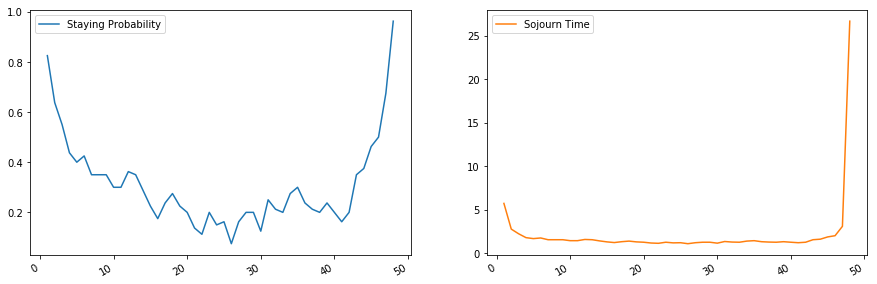

In [11]:
df_fullrank.plot(subplots=True, layout=(1,2), figsize=(15,5))

/Users/weikang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


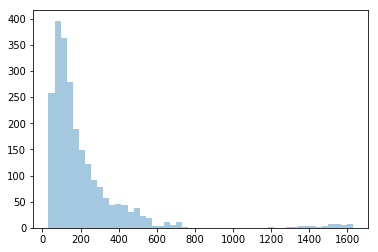

In [12]:
sns.distplot(m.fmpt.flatten(),kde=False)

## Geographic Rank Markov

In [13]:
from pysal.explore.giddy.markov import GeoRank_Markov, Markov, sojourn_time
gm = GeoRank_Markov(pci)

In [21]:
gm.transitions

array([[38.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0., 15.,  0., ...,  0.,  1.,  0.],
       [ 6.,  0., 44., ...,  5.,  0.,  0.],
       ...,
       [ 2.,  0.,  5., ..., 34.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 18.,  2.],
       [ 0.,  0.,  0., ...,  0.,  3., 14.]])

In [24]:
gm.p

array([[0.475 , 0.    , 0.1   , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.1875, 0.    , ..., 0.    , 0.0125, 0.    ],
       [0.075 , 0.    , 0.55  , ..., 0.0625, 0.    , 0.    ],
       ...,
       [0.025 , 0.    , 0.0625, ..., 0.425 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.225 , 0.025 ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.0375, 0.175 ]])

In [28]:
gm.sojourn_time[:10]

array([1.9047619 , 1.23076923, 2.22222222, 1.73913043, 1.15942029,
       3.80952381, 1.70212766, 1.25      , 1.31147541, 1.11111111])

In [14]:
gm.sojourn_time

array([ 1.9047619 ,  1.23076923,  2.22222222,  1.73913043,  1.15942029,
        3.80952381,  1.70212766,  1.25      ,  1.31147541,  1.11111111,
        1.73913043,  1.37931034,  1.17647059,  1.21212121,  1.33333333,
        1.37931034,  1.09589041,  2.10526316,  2.        ,  1.45454545,
        1.26984127, 26.66666667,  1.19402985,  1.23076923,  1.09589041,
        1.56862745,  1.26984127,  2.42424242,  1.50943396,  2.        ,
        1.29032258,  1.09589041,  1.6       ,  1.42857143,  1.25      ,
        1.45454545,  1.29032258,  1.6       ,  1.17647059,  1.56862745,
        1.25      ,  1.37931034,  1.45454545,  1.42857143,  1.29032258,
        1.73913043,  1.29032258,  1.21212121])

In [15]:
gm.fmpt

array([[ 48.        ,  63.35532038,  92.75274652, ...,  82.47515731,
         71.01114491,  68.65737127],
       [108.25928005,  48.        , 127.99032986, ...,  92.03098299,
         63.36652935,  61.82733039],
       [ 76.96801786,  64.7713783 ,  48.        , ...,  73.84595169,
         72.24682723,  69.77497173],
       ...,
       [ 93.3107474 ,  62.47670463, 105.80634118, ...,  48.        ,
         69.30121319,  67.08838421],
       [113.65278078,  61.1987031 , 133.57991745, ...,  96.0103924 ,
         48.        ,  56.74165107],
       [114.71894813,  63.4019776 , 134.73381719, ...,  97.287895  ,
         61.45565054,  48.        ]])

In [16]:
income_table["geo_sojourn_time"] = gm.sojourn_time
i = 0
for state in income_table["Name"]:
    income_table["geo_fmpt_to_" + state] = gm.fmpt[:,i]
    income_table["geo_fmpt_from_" + state] = gm.fmpt[i,:]
    i = i + 1
income_table.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,geo_fmpt_to_Virginia,geo_fmpt_from_Virginia,geo_fmpt_to_Washington,geo_fmpt_from_Washington,geo_fmpt_to_West Virginia,geo_fmpt_from_West Virginia,geo_fmpt_to_Wisconsin,geo_fmpt_from_Wisconsin,geo_fmpt_to_Wyoming,geo_fmpt_from_Wyoming
0,Alabama,1,323,267,224,162,166,211,217,251,...,72.186055,109.828532,82.994754,118.769984,82.475157,93.310747,71.011145,113.652781,68.657371,114.718948
1,Arizona,4,600,520,429,321,308,362,416,462,...,67.544447,60.838807,76.090895,66.729262,92.030983,62.476705,63.366529,61.198703,61.827330,63.401978
2,Arkansas,5,310,228,215,157,157,187,207,247,...,73.650943,129.533691,84.071211,138.692513,73.845952,105.806341,72.246827,133.579917,69.774972,134.733817
3,California,6,991,887,749,580,546,603,660,771,...,71.377700,111.644884,62.230417,97.908341,104.922271,121.670243,69.368408,110.668388,59.998457,105.965215
4,Colorado,8,634,578,471,354,353,368,444,542,...,69.627179,57.106339,66.353930,52.229230,98.797636,66.464398,60.762589,52.324565,55.559020,53.872702


In [17]:
geo_table = gpd.read_file(ps.examples.get_path('us48.shp'))
# income_table = pd.read_csv(pysal.lib.examples.get_path("usjoin.csv"))
complete_table = geo_table.merge(income_table,left_on='STATE_NAME',right_on='Name')
complete_table.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,geo_fmpt_to_Virginia,geo_fmpt_from_Virginia,geo_fmpt_to_Washington,geo_fmpt_from_Washington,geo_fmpt_to_West Virginia,geo_fmpt_from_West Virginia,geo_fmpt_to_Wisconsin,geo_fmpt_from_Wisconsin,geo_fmpt_to_Wyoming,geo_fmpt_from_Wyoming
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,71.663055,73.756804,48.000000,48.000000,101.592400,81.692586,65.219124,70.701226,53.126177,64.476985
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,69.918931,59.067897,76.184088,64.710823,90.781850,58.795201,63.455248,58.975522,60.881954,60.553000
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,69.431862,53.872836,77.512381,62.862378,87.734760,54.244823,66.257807,56.905741,61.978506,58.336426
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,69.441690,56.526347,76.659646,62.823668,85.031218,49.511240,67.362718,58.717458,64.386382,59.728719
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,68.229894,61.548209,78.886304,68.794083,88.192659,55.754109,66.187694,63.802359,64.336311,65.070022


In [18]:
complete_table.columns

Index(['AREA', 'PERIMETER', 'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS_x',
       'SUB_REGION', 'STATE_ABBR', 'geometry', 'Name',
       ...
       'geo_fmpt_to_Virginia', 'geo_fmpt_from_Virginia',
       'geo_fmpt_to_Washington', 'geo_fmpt_from_Washington',
       'geo_fmpt_to_West Virginia', 'geo_fmpt_from_West Virginia',
       'geo_fmpt_to_Wisconsin', 'geo_fmpt_from_Wisconsin',
       'geo_fmpt_to_Wyoming', 'geo_fmpt_from_Wyoming'],
      dtype='object', length=189)

Visualizing first mean passage time from/to California/Mississippi:

/Users/weikang/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/weikang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


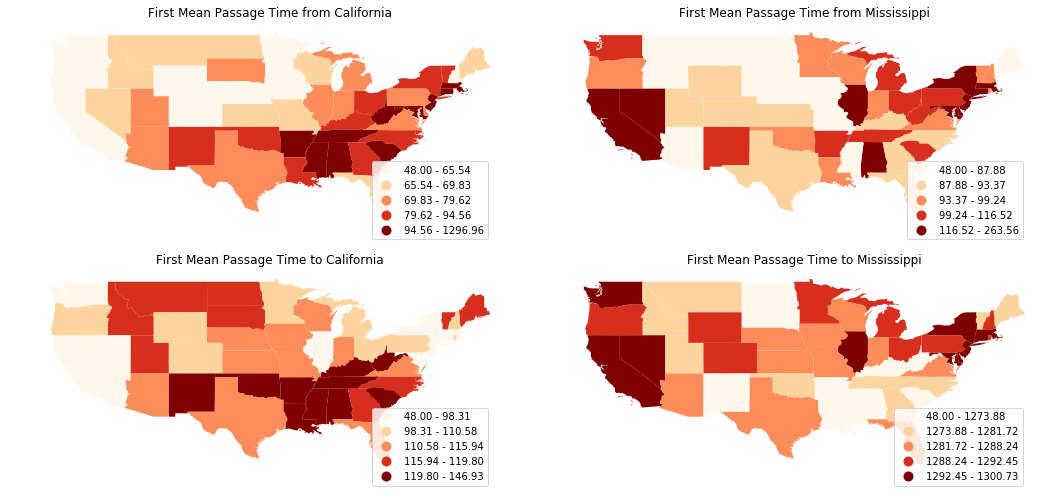

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15,7))
target_states = ["California","Mississippi"]
directions = ["from","to"]
for i, direction in enumerate(directions):
    for j, target in enumerate(target_states):
        ax = axes[i,j]
        col = direction+"_"+target
        complete_table.plot(ax=ax,column = "geo_fmpt_"+ col,cmap='OrRd', 
                    scheme='quantiles', legend=True)
        ax.set_title("First Mean Passage Time "+direction+" "+target)
        ax.axis('off')
        leg = ax.get_legend()
        leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
plt.tight_layout()

Visualizing sojourn time for each US state:

/Users/weikang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


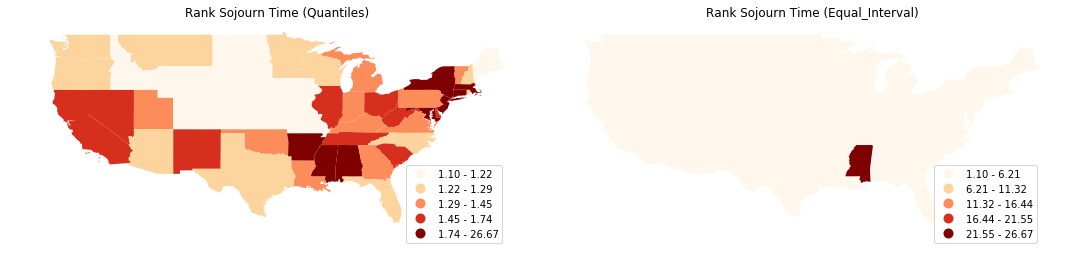

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (15,7))
schemes = ["Quantiles","Equal_Interval"]
for i, scheme in enumerate(schemes):
    ax = axes[i]
    complete_table.plot(ax=ax,column = "geo_sojourn_time",cmap='OrRd', 
                scheme=scheme, legend=True)
    ax.set_title("Rank Sojourn Time ("+scheme+")")
    ax.axis('off')
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
plt.tight_layout()